In [24]:
df <- read.csv("KTE2_VA.csv", header = TRUE)  # Assuming headers are present
head(df)

,date,time,VA,hour,day_of_week,month,day_of_year
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,2022-01-01,00:01:00,237.234,0,7,1,1
2,2022-01-01,00:57:00,234.406,0,7,1,1
3,2022-01-01,01:25:00,235.978,1,7,1,1
4,2022-01-01,01:54:00,233.935,1,7,1,1
5,2022-01-01,02:22:00,235.131,2,7,1,1
6,2022-01-01,02:50:00,235.016,2,7,1,1


Warning message:
“Use of `df$date` is discouraged.
ℹ Use `date` instead.”
Warning message:
“Use of `df[[col]]` is discouraged.
ℹ Use `.data[[col]]` instead.”


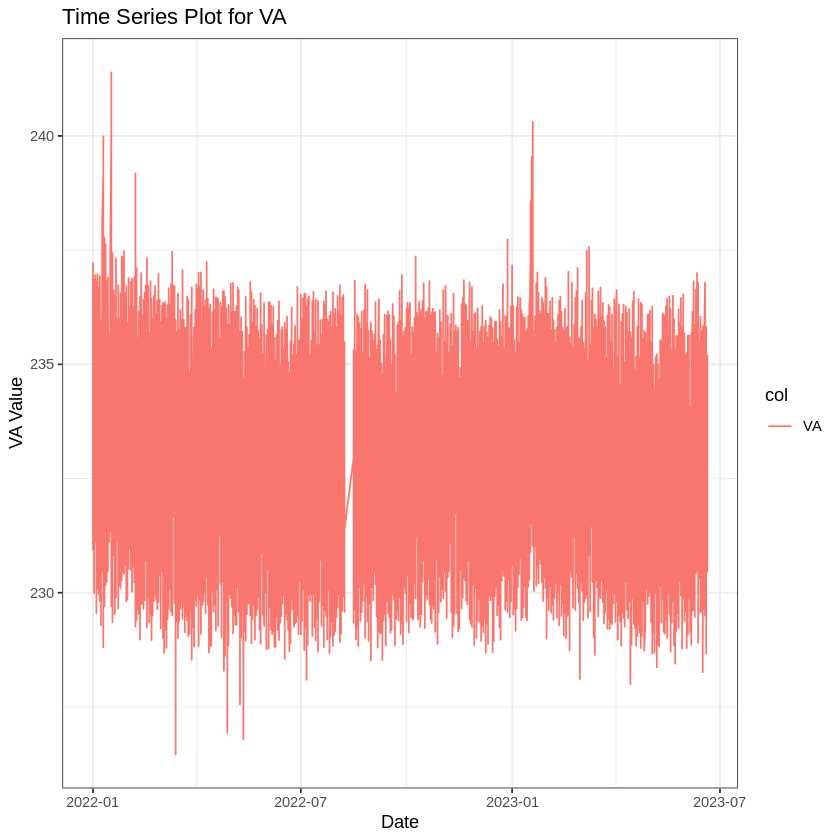

In [25]:
col <- "VA"

# Create the plot with ggplot2
library(ggplot2)  # Load ggplot2 package if not already installed

ggplot(df, aes(x = as.Date(df$date), y = df[[col]])) +  # Set x-axis as date from 'system' column, y-axis as 'VA' column
  geom_line(aes(color = col)) +  # Plot a line with color for 'VA'
  labs(title = "Time Series Plot for VA", x = "Date", y = "VA Value") +  # Set labels
  theme_bw()

In [39]:
df$datetime <- paste(toString(as.Date(df$date)), toString(as.difftime(df$time)),sep=" ")

In [22]:
df <- df["VA"]  # Select by column name

df_resample <- to.hourly(df) %>% mean()


dim(df_resample)

ERROR: Error in try.xts(x): Error in as.xts.double(x, ..., .RECLASS = TRUE) :   order.by must be either 'names()' or otherwise specified


In [44]:
model <- lm(VA ~ date, data = df)

# Print the model summary
summary(model)



Call:
lm(formula = VA ~ date, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8254 -1.0517  0.0248  1.1022  6.8626 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    234.062540   0.223801 1045.852  < 2e-16 ***
date2022-01-02  -0.229625   0.321513   -0.714 0.475109    
date2022-01-03  -0.589415   0.319782   -1.843 0.065315 .  
date2022-01-04  -0.387760   0.316502   -1.225 0.220533    
date2022-01-05  -0.043582   0.319782   -0.136 0.891597    
date2022-01-06  -0.639519   0.319782   -2.000 0.045526 *  
date2022-01-07  -0.134344   0.314947   -0.427 0.669703    
date2022-01-08  -0.596581   0.318113   -1.875 0.060753 .  
date2022-01-09   0.207524   0.321513    0.645 0.518635    
date2022-01-10  -0.238680   0.316502   -0.754 0.450785    
date2022-01-11  -0.656167   0.314947   -2.083 0.037223 *  
date2022-01-12  -0.208009   0.318113   -0.654 0.513192    
date2022-01-13   0.066141   0.321513    0.206 0.837013    
date2022-01-14  -0.9866